In [192]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sfp_nsdsyn as sfp
import sfp_nsdsyn.visualization as vis
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
pd.options.mode.chained_assignment = None
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load parameter files

In [10]:
results_dir='/Volumes/server/Projects/sfp_nsd/natural-scenes-dataset/derivatives/derivatives_HPC/results_2D'
dataset = 'nsdsyn'
stat = 'mean'
full_ver= [True]
sn_list = np.arange(1,9)
lr_rate = [0.0005]
max_epoch = [30000]
roi_list = ['V1','V2','V3']
fig_dir='/Users/jh7685/Dropbox/NYU/Projects/SF/MyResults/2D_tuning_prediction'
sn = 1

In [11]:
all_model_history = sfp.two_dimensional_model.load_history_df_subj(results_dir, dataset, stat, full_ver, [sn], lr_rate, max_epoch, 'model', roi_list)
final_params = all_model_history.query('epoch == 29999')

 ## melt final_params variable

In [185]:
params =['sigma','slope','intercept','p_1','p_2','p_3','p_4','A_1','A_2']
group = [1,2,2,3,3,3,3,3,3]

/Users/jh7685/opt/miniconda3/envs/sfp/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


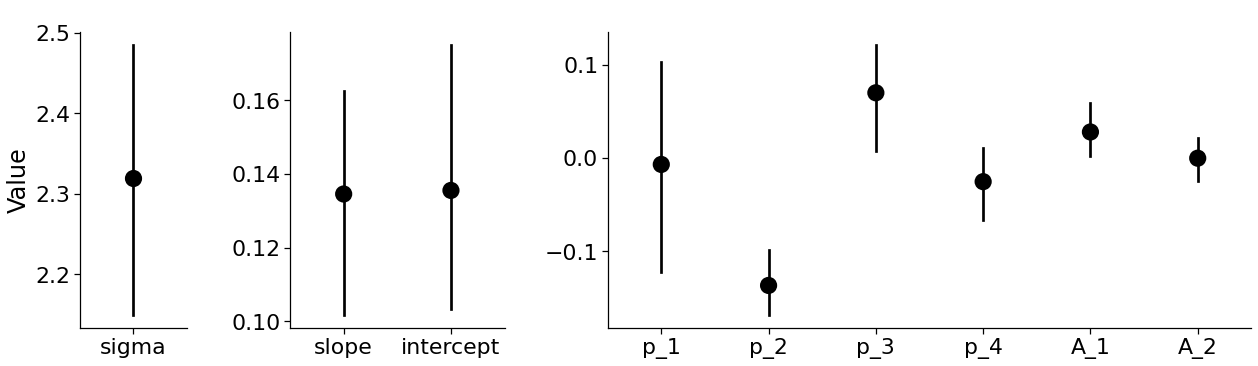

In [191]:
grid = vis.plot_2D_model_results.plot_avg_parameters(final_params, params, group)

In [174]:
grid.axes[0,2].collections[0].get_size().item()

103.05994700101321

# Plot individual parameters
## Load all subject's data

In [26]:
all_model_history = sfp.two_dimensional_model.load_history_df_subj(results_dir, dataset, stat, full_ver, sn_list, lr_rate, max_epoch, 'model', ['V1'])
final_params = all_model_history.query('epoch == 29999')

In [135]:
test = sfp.two_dimensional_model.add_param_type_column(final_params, params)

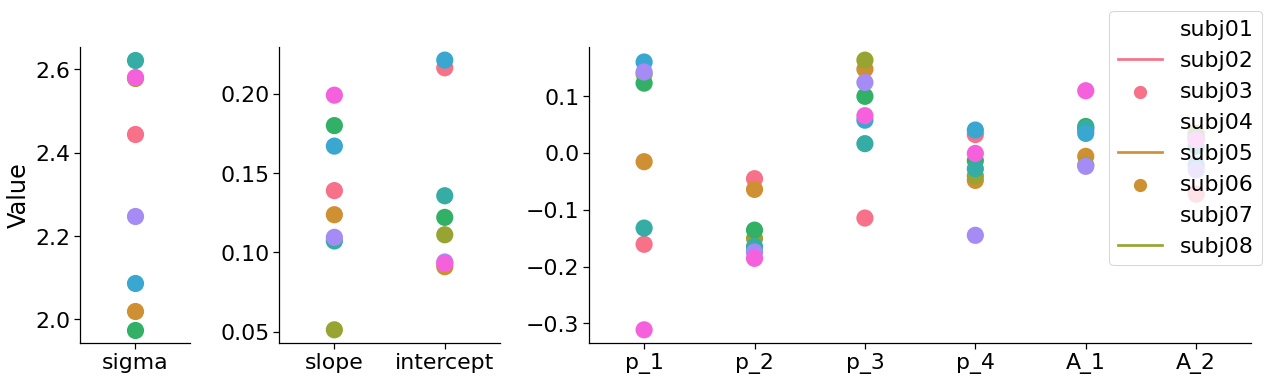

In [229]:
vis.plot_2D_model_results.plot_individual_parameters(final_params, params, group)

# Polar plots
## Shape data - we now need to calculate predicted preferred period (deg).
1. we load in each stimulus information (stim orientation $\theta_l$)
2. Make continuous eccentricity df
3. Merge eccen df with stimulus information
4. Plug in those value to make $P_v$
5. make a figure for preferred period vs. eccentricity


In [211]:
stim_info = pd.read_csv('/Volumes/server/Projects/sfp_nsd/natural-scenes-dataset/nsdsynthetic_sf_stim_description.csv')
stim_info = stim_info[['names','names_idx','w_r','w_a','phase','class_idx','freq_lvl']]
stim_info = stim_info.drop_duplicates(subset=stim_info.drop(columns='phase').columns.tolist())

In [216]:
all_ecc_final_params = vis.plot_2D_model_results.merge_continuous_eccentricity(final_params, ecc_range=(0,5), repeat=1000, col_name='eccentricity')
all_ecc_final_params.tail()

/Users/jh7685/Documents/Projects/spatial-frequency-preferences_NSDsyn/sfp_nsdsyn/visualization/plot_2D_model_results.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_label = "Parameter"


,epoch,sigma,slope,intercept,p_1,p_2,p_3,p_4,A_1,A_2,dset,lr_rate,max_epoch,full_ver,subj,vroinames,eccentricity
7995,29999,1.975181,0.179895,0.122055,0.122718,-0.135793,0.099535,-0.013634,0.046516,0.028437,nsdsyn,0.0005,30000,True,subj04,V1,5.0
7996,29999,2.622015,0.107188,0.135675,-0.132166,-0.164759,0.016274,-0.027864,0.043370,0.011752,nsdsyn,0.0005,30000,True,subj05,V1,5.0
7997,29999,2.087170,0.166967,0.221159,0.159871,-0.173341,0.057587,0.040253,0.034356,-0.021300,nsdsyn,0.0005,30000,True,subj06,V1,5.0
7998,29999,2.249080,0.109479,0.093930,0.142332,-0.174437,0.123923,-0.144933,-0.023559,-0.029919,nsdsyn,0.0005,30000,True,subj07,V1,5.0
7999,29999,2.581744,0.199068,0.093001,-0.311129,-0.185420,0.065450,-0.000913,0.109359,0.023116,nsdsyn,0.0005,30000,True,subj08,V1,5.0


In [206]:
all_ecc_stim_info['P_v'] =

Index(['image_idx', 'names', 'names_idx', 'w_r', 'w_a', 'phase', 'phase_idx',
       'class_idx', 'freq_lvl'],
      dtype='object')

In [205]:
? pd.drop_duplicates

Object ` pd.drop_duplicates` not found.


In [194]:
test_df = final_params.query('subj == "subj01"')
vis.plot_2D_model_results.plot_parameters_in_polar(test_df, params, group)

KeyError: 'names'

In [196]:
test_df.keys()

Index(['epoch', 'sigma', 'slope', 'intercept', 'p_1', 'p_2', 'p_3', 'p_4',
       'A_1', 'A_2', 'dset', 'lr_rate', 'max_epoch', 'full_ver', 'subj',
       'vroinames'],
      dtype='object')